In [1]:
import os
import json

In [3]:
main_folder = 'RIS_fingerprint_isomorphism_random_modified_graph'
folder_sudies_path = 'RIS_fingerprint_images_folders_studies'

folders = os.listdir(main_folder)
folders.sort()
#print(folders)

number_edge_matches = {}
first = True

same_graph = []
same_finger = []
same_person = []
same_family = []
strangers = []

name_family_1 = '00'

for folder in folders:
    #if first:

        path_current_folder = main_folder + "/" + folder
        #print(folder)
        files = os.listdir(main_folder + '/' + folder)
        
        score = len(files)
        
        if 'data_matches.json' in files:
            score = score - 1
        
        #print(score)

        name1 = folder[0:11]
        name2 = folder[12:]

        name_fam_tem = name1[0:2]
        if name_fam_tem != name_family_1:
            name_family_1 = name_fam_tem
            print(name_family_1)
        
        if name1 != name2:
            if name1[0:2] == name2[0:2]:
                if name1[3:5] == name2[3:5]:
                    if name1[6:8] == name2[6:8]:
                        same_finger.append(score)
                    else:
                        same_person.append(score)
                else:
                    if (name1[3:5] == 'B0' and name2[3:5] == 'C0') or (name1[3:5] == 'C0' and name2[3:5] == 'B0'):
                        strangers.append(score)
                    else:
                        same_family.append(score)
            else:
                strangers.append(score)
        else:
            same_graph.append(score)
        
        first = False

print(len(same_graph))
print(len(same_finger))
print(len(same_person))
print(len(same_family))
print(len(strangers))


01
[]
[]
[480]
[]
[]


In [20]:
print(sum(same_finger)/len(same_finger))
print(sum(same_person)/len(same_person))
print(sum(same_family)/len(same_family))
print(sum(strangers)/len(strangers))

756.6376811594203
476.9981884057971
458.6541305046609
390.5401941747573


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st


In [22]:
print(np.percentile(np.array(same_finger),50))
print(np.percentile(np.array(same_person),50))
print(np.percentile(np.array(same_family),50))
print(np.percentile(np.array(strangers),50))

541.0
361.5
354.0
314.0


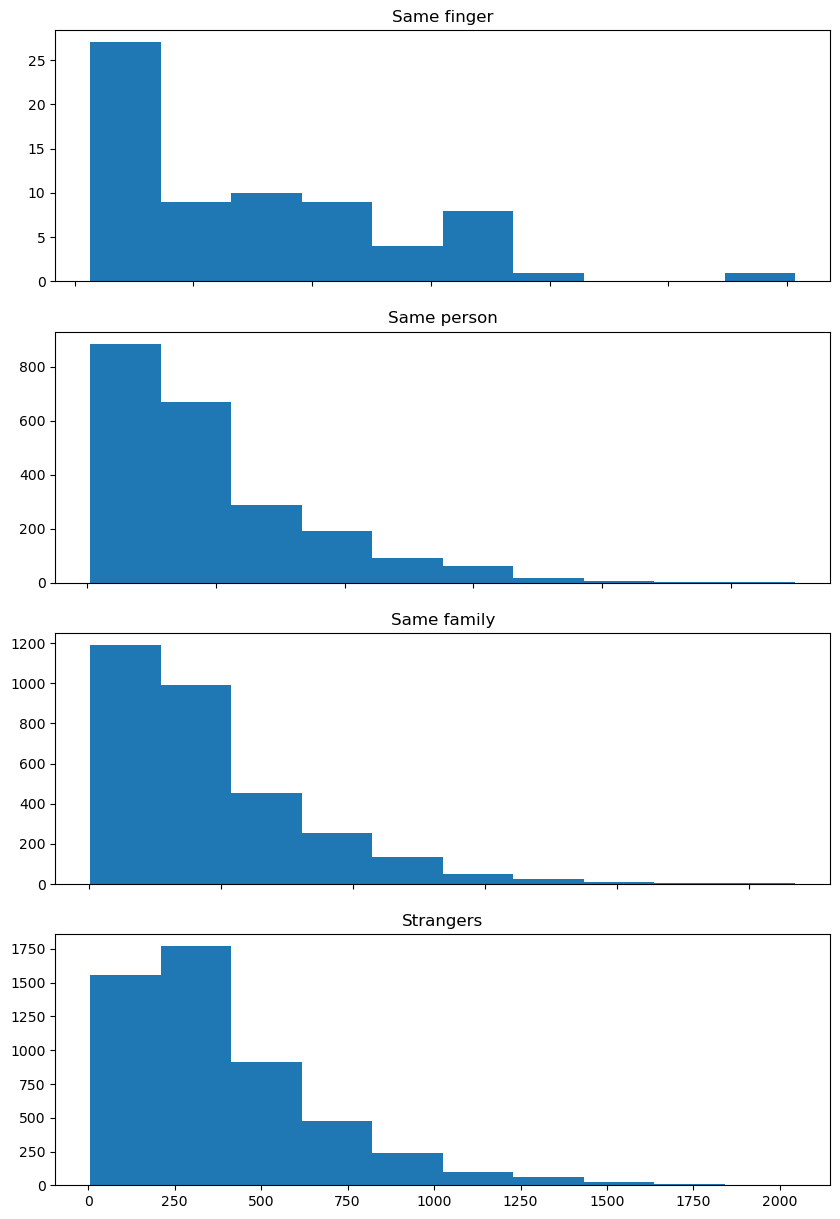

In [23]:
fig, axs = plt.subplots(4, 1)
axs[0].hist(same_finger)
axs[0].set_title('Same finger')
axs[1].hist(same_person)
axs[1].set_title('Same person')
axs[2].hist(same_family)
axs[2].set_title('Same family')
axs[3].hist(strangers)
axs[3].set_title('Strangers')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

fig.set_figwidth(10)
fig.set_figheight(15)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('hist_score_jaccard_matches.png')

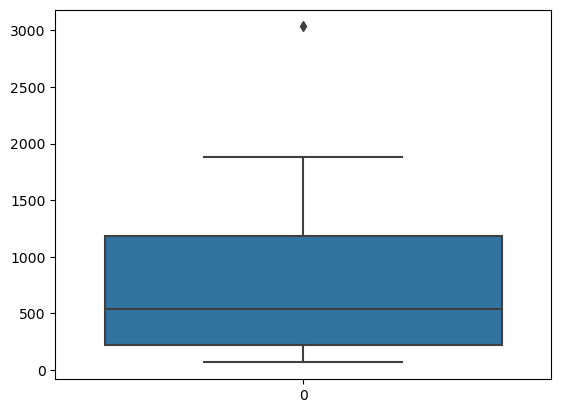

In [24]:
sns.boxplot(data=same_finger)

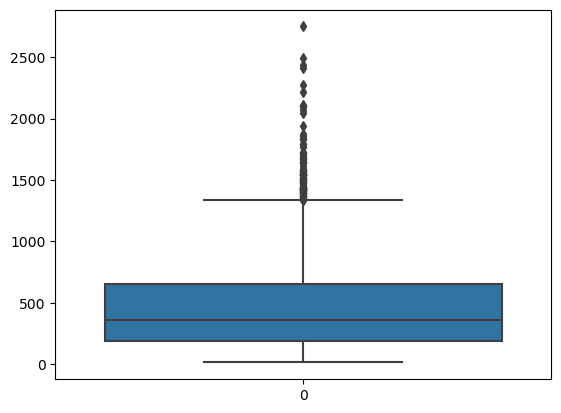

In [25]:
sns.boxplot(data=same_person)

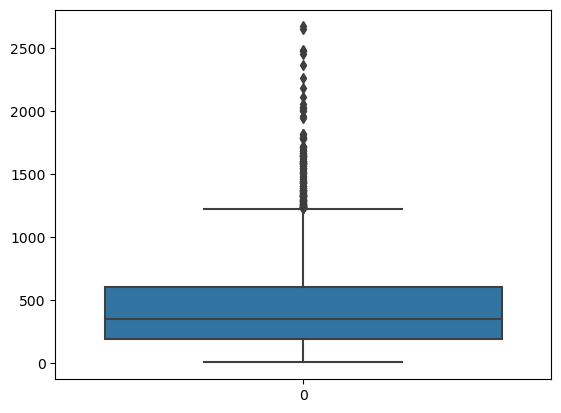

In [26]:
sns.boxplot(data=same_family)

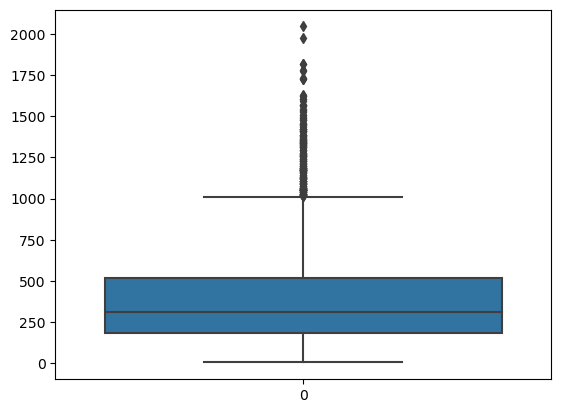

In [27]:
sns.boxplot(data=strangers)

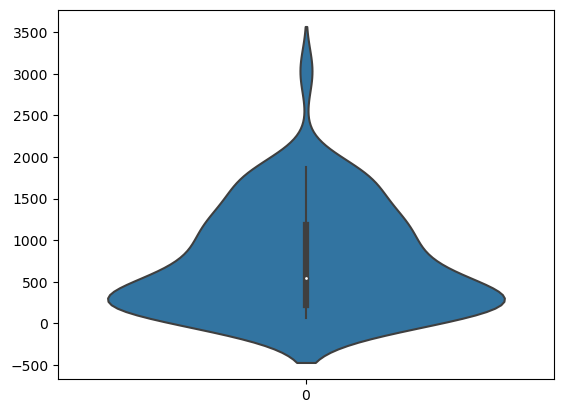

In [28]:
sns.violinplot(data=same_finger)

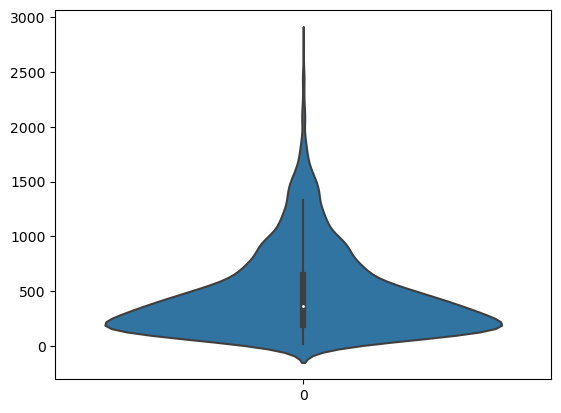

In [29]:
sns.violinplot(data=same_person)

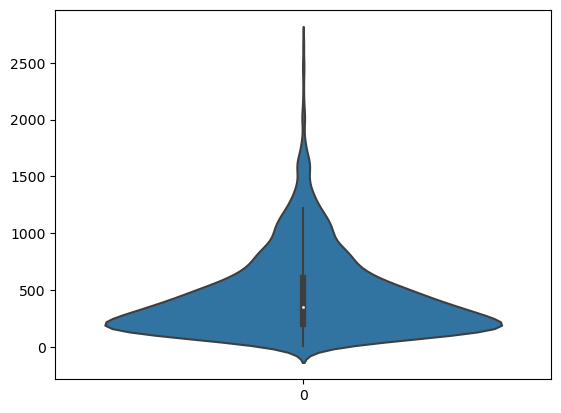

In [30]:
sns.violinplot(data=same_family)

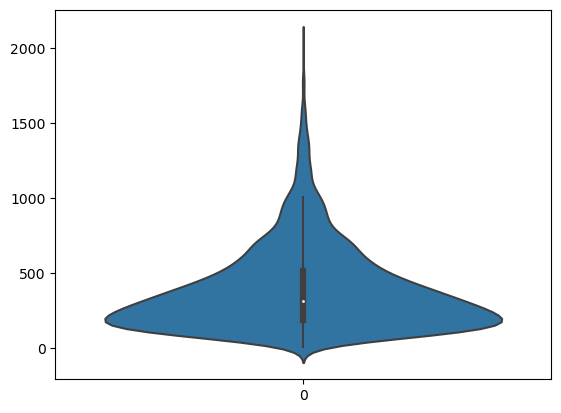

In [31]:
sns.violinplot(data=strangers)

In [32]:
import pandas as pd

In [33]:
score_col = []
type_ralation = []

for el in same_finger:
    score_col.append(el)
    type_ralation.append('same_finger')

for el in same_person:
    score_col.append(el)
    type_ralation.append('same_person')

for el in same_family:
    score_col.append(el)
    type_ralation.append('same_family')

for el in strangers:
    score_col.append(el)
    type_ralation.append('strangers')

data = {'Score': score_col, 'Type_relation': type_ralation}
df = pd.DataFrame(data)

df

,Score,Type_relation
0,837,same_finger
1,541,same_finger
2,310,same_finger
3,1674,same_finger
4,1211,same_finger
...,...,...
10533,195,strangers
10534,356,strangers
10535,226,strangers
10536,107,strangers


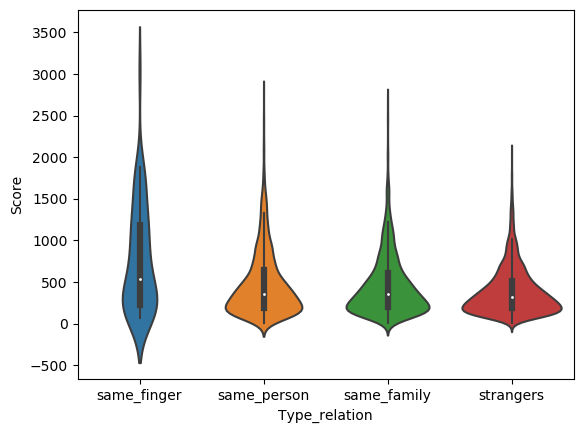

In [34]:
sns.violinplot(x='Type_relation',y='Score', data=df)

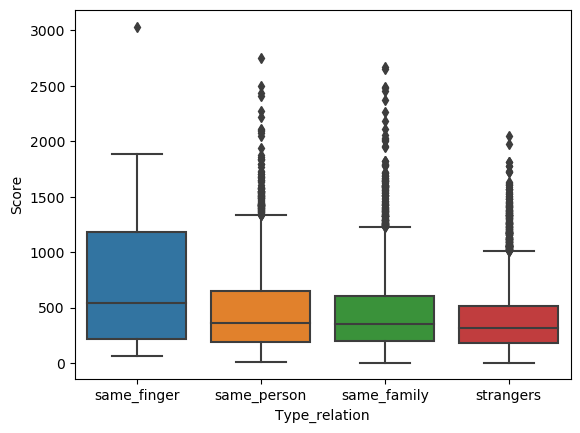

In [35]:
sns.boxplot(x='Type_relation',y='Score', data=df)